In [2]:
from tqdm import tqdm
import sys
import importlib
sys.path.append("/home/sambt/analytic-qg-classifiers/analysis/utils/")
from master import *
prefix = '/home/sambt/pythia83-samples/optimal-classifiers/kernel-1/'

In [3]:
importlib.reload(analysis)
CF = 4/3
CA = 3.0
f_opt = lambda x : np.log(CF/CA)*np.count_nonzero(x,axis=1) + np.sum(x,axis=1)
pred = r'$\ln(\frac{C_F}{C_A})n^{(0)} + n^{(1)}$'
rocs_r4,aucs_r4,labels_r4 = analysis.run_pipeline('H2qq-CF1.3CA3.0-sq0100-esq0010-r0.4','H2gg-CF3.0CA3.0-sqg0100-r0.4',f_opt,predicted=pred)
rocs_r1,aucs_r1,labels_r1 = analysis.run_pipeline('H2qq-CF1.3CA3.0-sq0100-esq0010-r1.0','H2gg-CF3.0CA3.0-sqg0100-r1.0',f_opt,predicted=pred)
rocs_r15,aucs_r15,labels_r15 = analysis.run_pipeline('H2qq-CF1.3CA3.0-sq0100-esq0010-r1.5','H2gg-CF3.0CA3.0-sqg0100-r1.5',f_opt,predicted=pred)

Loaded files at 0.06309866905212402
Read in arrays at 1.6943879127502441
Cleaned events at 1.7759852409362793
Made quark/gluon input arrays at 4.383866548538208
Finished preprocessing at 10.620656490325928
Training PFN
PFN AUC: 0.6076859548335736
Training PFN[z]
PFN[z] AUC: 0.6048616973517179
Training PFN[eta,phi]
PFN[eta,phi] AUC: 0.5980827229286212
Training EFN
EFN AUC: 0.5768017347538765
Loaded files at 0.07952523231506348
Read in arrays at 1.7826991081237793
Cleaned events at 1.8631260395050049
Made quark/gluon input arrays at 6.623461723327637
Finished preprocessing at 13.130457878112793
Training PFN
PFN AUC: 0.6021928887904661
Training PFN[z]
PFN[z] AUC: 0.6086193049086838
Training PFN[eta,phi]
PFN[eta,phi] AUC: 0.583503492933093
Training EFN
EFN AUC: 0.5745232914763811
Loaded files at 0.05841255187988281
Read in arrays at 1.8752515316009521
Cleaned events at 1.9591846466064453
Made quark/gluon input arrays at 7.525012493133545
Finished preprocessing at 14.097699403762817
Trainin

Text(0.02, 0.35, '$P_{q \\to qg} \\propto e^{z}$')

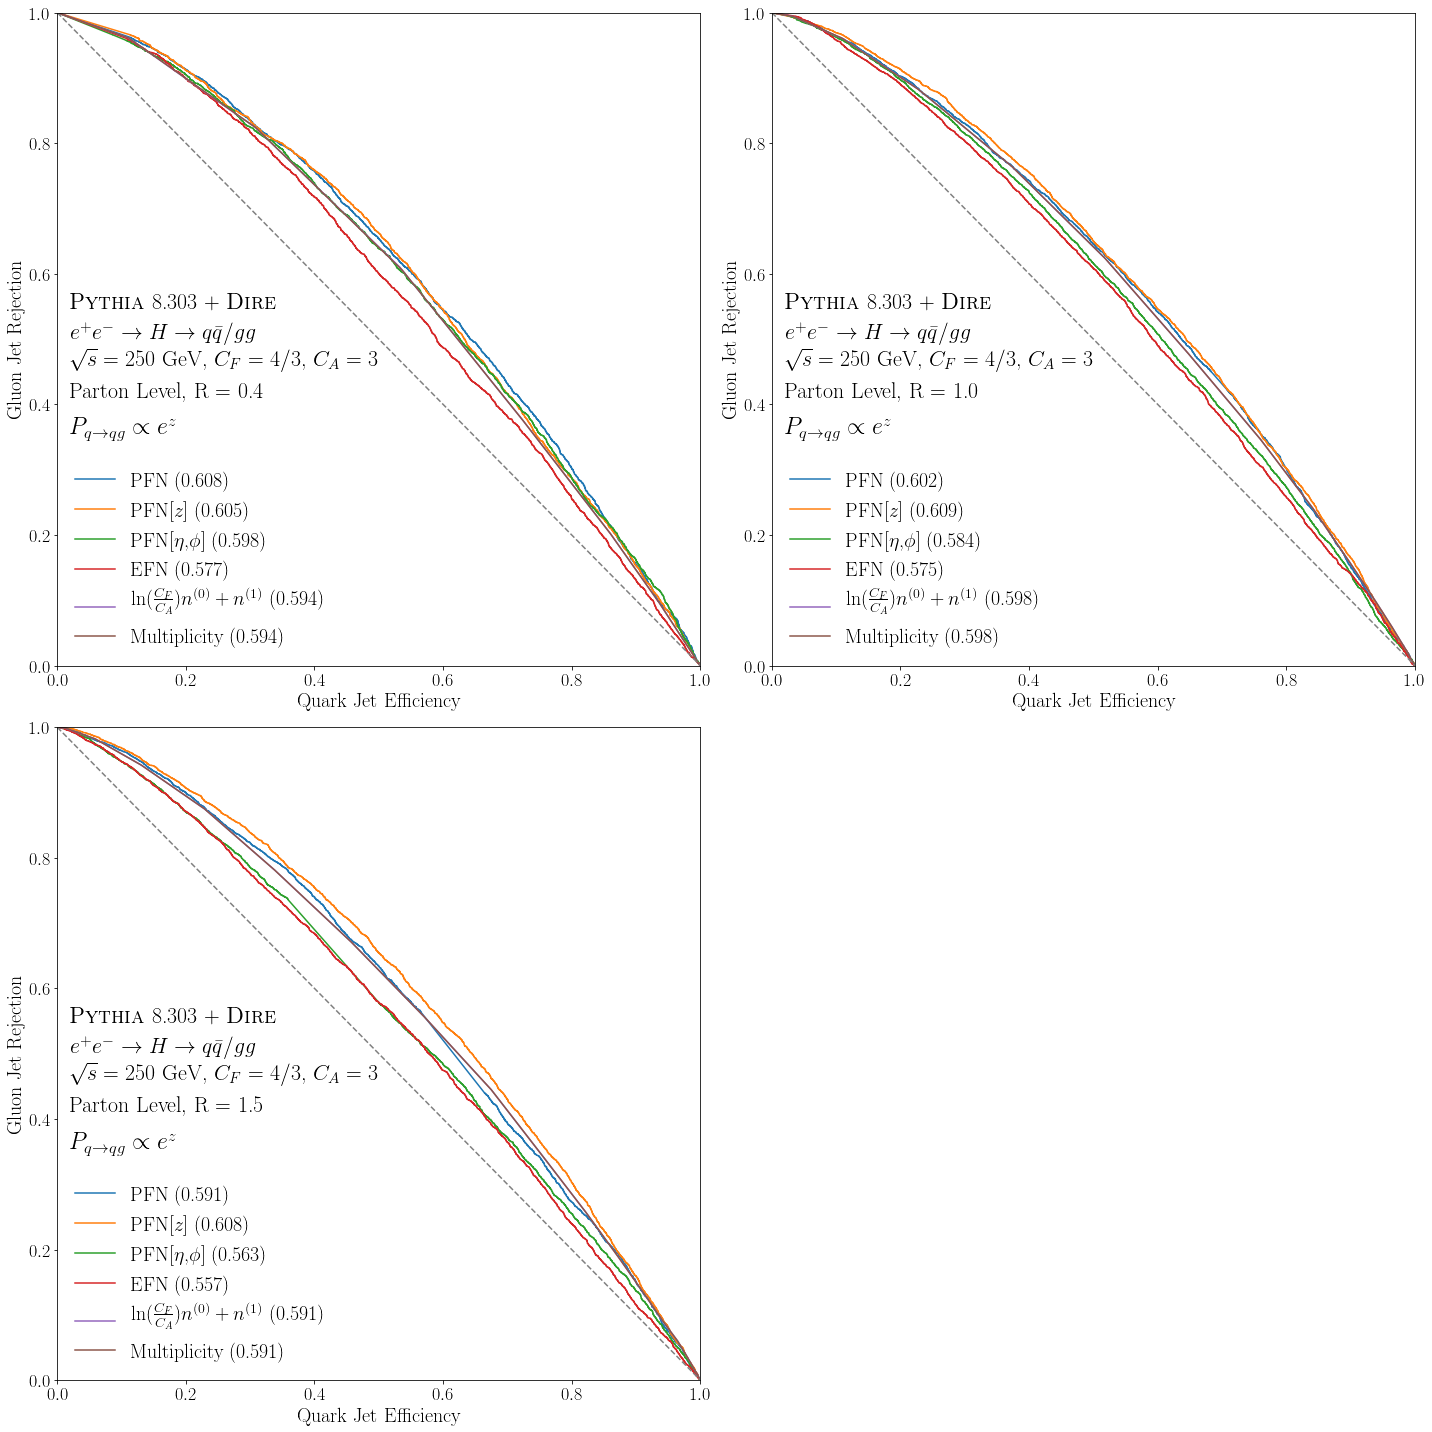

In [4]:
importlib.reload(plotting)
fig = plt.figure(figsize=(20,20))
split = r'$P_{q \to qg} \propto e^{z}$'
line_3 = r'$\sqrt{s} = 250$ GeV, $C_F = 4/3$, $C_A = 3$'
ax1 = plt.subplot(221)
plotting.plot_many(rocs_r4,aucs_r4,labels_r4,ax1,fontsize=20)
plotting.stamp(0.02,0.6,fontsize=22,delta_y=0.045,line_3=line_3)
plt.text(0.02,0.35,split,fontsize=24)
ax2 = plt.subplot(222)
plotting.plot_many(rocs_r1,aucs_r1,labels_r1,ax2,fontsize=20)
plotting.stamp(0.02,0.6,radius=1.0,fontsize=22,delta_y=0.045,line_3=line_3)
plt.text(0.02,0.35,split,fontsize=24)
ax3 = plt.subplot(223)
plotting.plot_many(rocs_r15,aucs_r15,labels_r15,ax3,fontsize=20)
plotting.stamp(0.02,0.6,radius=1.5,fontsize=22,delta_y=0.045,line_3=line_3)
plt.text(0.02,0.35,split,fontsize=24)

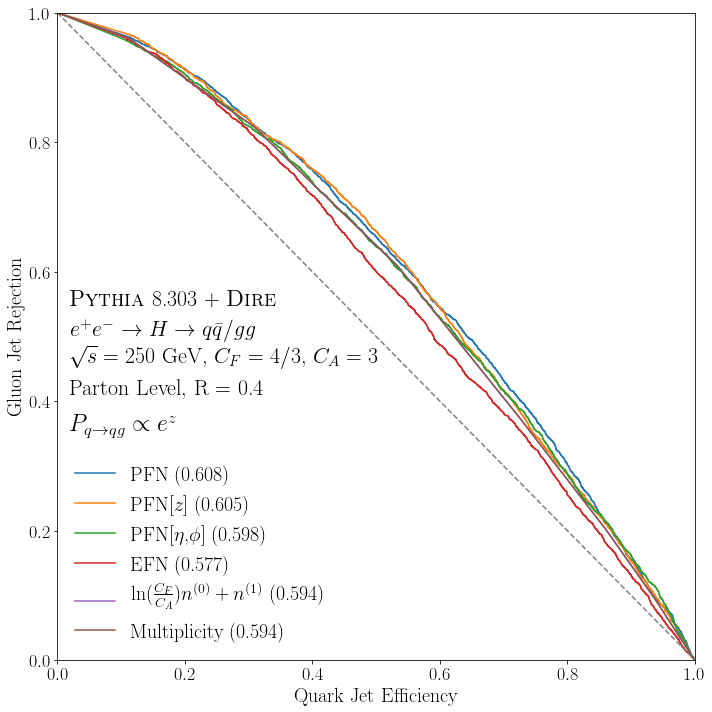

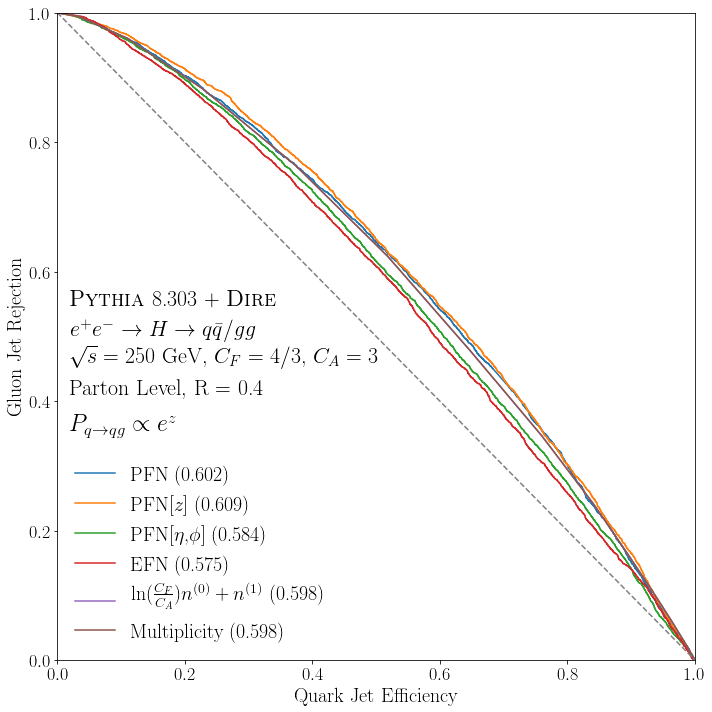

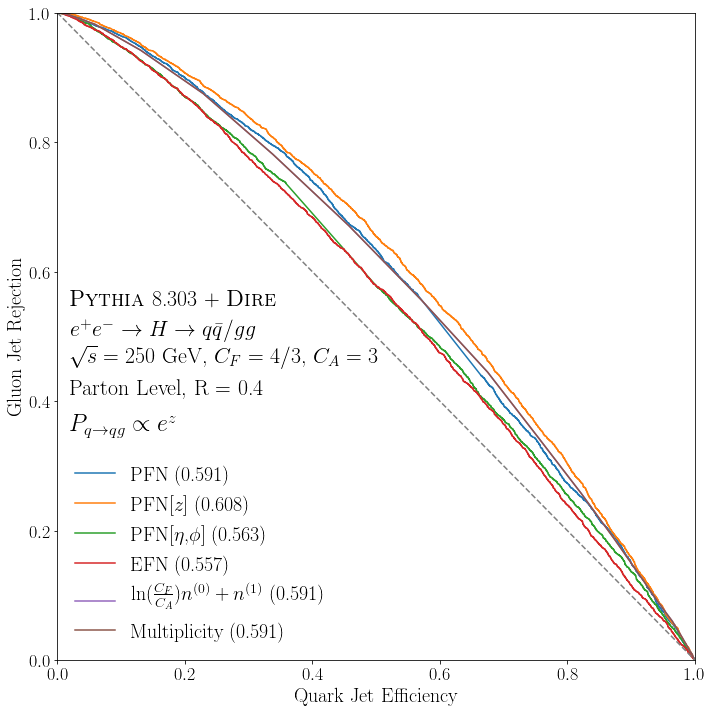

In [5]:
roc_list = [rocs_r4,rocs_r1,rocs_r15]
auc_list = [aucs_r4,aucs_r1,aucs_r15]
lab_list = [labels_r4,labels_r1,labels_r15]
rads = [0.4,1.0,1.5]
line_3 = r'$\sqrt{s} = 250$ GeV, $C_F = 4/3$, $C_A = 3$'
for i in range(len(roc_list)):
    plt.figure(figsize=(10,10))
    ax = plt.gca()
    rocs,aucs,labels = roc_list[i],auc_list[i],lab_list[i]
    plotting.plot_many(rocs,aucs,labels,ax,fontsize=20)
    plotting.stamp(0.02,0.6,fontsize=22,delta_y=0.045,line_3=line_3)
    plt.text(0.02,0.35,split,fontsize=24)
    plt.savefig('plots/ROCs_CF1.3CA3.0_sqg0100-esq0010-r'+str(rads[i])+'.pdf')

In [3]:
#Setup for scan in c0-c1 plane to determine which observables are best
def observable(c0,c1):
    return lambda x : c0*np.count_nonzero(x,axis=1) + c1*np.sum(x*np.log(x,where=x>0,out=np.zeros(x.shape)),axis=1)
c0s = np.linspace(-2,2,num=41)
c1s = np.linspace(0,2,num=21)
points = []
functions = []
for c0 in c0s:
    for c1 in c1s:
        point = "{0:.4f},{1:.4f}".format(c0,c1)
        points.append(point)
        functions.append(observable(c0,c1))

In [4]:
#Scanning in c0,c1 to see how AUC changes for optimal observable ln L = c0n(0) + c1n(2)
#H-->qq sample generated with CF = 4/3, P(q->qg) = (1/z)exp(z^2), R = 0.4
rocs_c0c1_scan_r4,aucs_c0c1_scan_r4 = analysis.run_custom_obs('H2qq-CF1.3CA3.0-sq0100-esq0010-r0.4','H2gg-CF3.0CA3.0-sqg0100-r0.4',functions)
rocs_c0c1_scan_r1,aucs_c0c1_scan_r1 = analysis.run_custom_obs('H2qq-CF1.3CA3.0-sqg0100-esq0010-r1.0','H2gg-CF3.0CA3.0-sqg0100-r1.0',functions,suffix='/total_1M.root')
rocs_c0c1_scan_r15,aucs_c0c1_scan_r15 = analysis.run_custom_obs('H2qq-CF1.3CA3.0-sq0100-esq0010-r1.5','H2gg-CF3.0CA3.0-sqg0100-r1.5',functions)
grid_r4 = np.zeros((c0s.size,c1s.size))
grid_r1 = np.zeros((c0s.size,c1s.size))
grid_r15 = np.zeros((c0s.size,c1s.size))
for i,c0 in tqdm(enumerate(c0s)):
    for j,c1 in enumerate(c1s):
        point = "{0:.4f},{1:.4f}".format(c0,c1)
        idx = points.index(point)
        grid_r4[i,j] = aucs_c0c1_scan_r4[idx]
        grid_r1[i,j] = aucs_c0c1_scan_r1[idx]
        grid_r15[i,j] = aucs_c0c1_scan_r15[idx]

Loaded files at 0.08140850067138672
Read in arrays at 1.691437005996704
Cleaned events at 1.772838830947876
Made quark/gluon input arrays at 1.8320629596710205
Finished preprocessing at 2.4805080890655518
Loaded files at 0.12300467491149902
Read in arrays at 16.448403120040894
Cleaned events at 17.214219570159912
Made quark/gluon input arrays at 17.994749069213867
Finished preprocessing at 28.615710020065308
Loaded files at 0.05283355712890625
Read in arrays at 1.724168300628662
Cleaned events at 1.8041903972625732
Made quark/gluon input arrays at 1.8962063789367676
Finished preprocessing at 3.2731049060821533


41it [00:00, 5302.21it/s]


In [5]:
print(grid_r4.max())
print(grid_r1.max())
print(grid_r15.max())
print("--------------")
print(grid_r4.min())
print(grid_r1.min())
print(grid_r15.min())

0.602567648
0.6086038032000001
0.6043545615999999
--------------
0.5
0.5
0.5


(array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,
         2.  ,  2.25]),
 <a list of 11 Text yticklabel objects>)

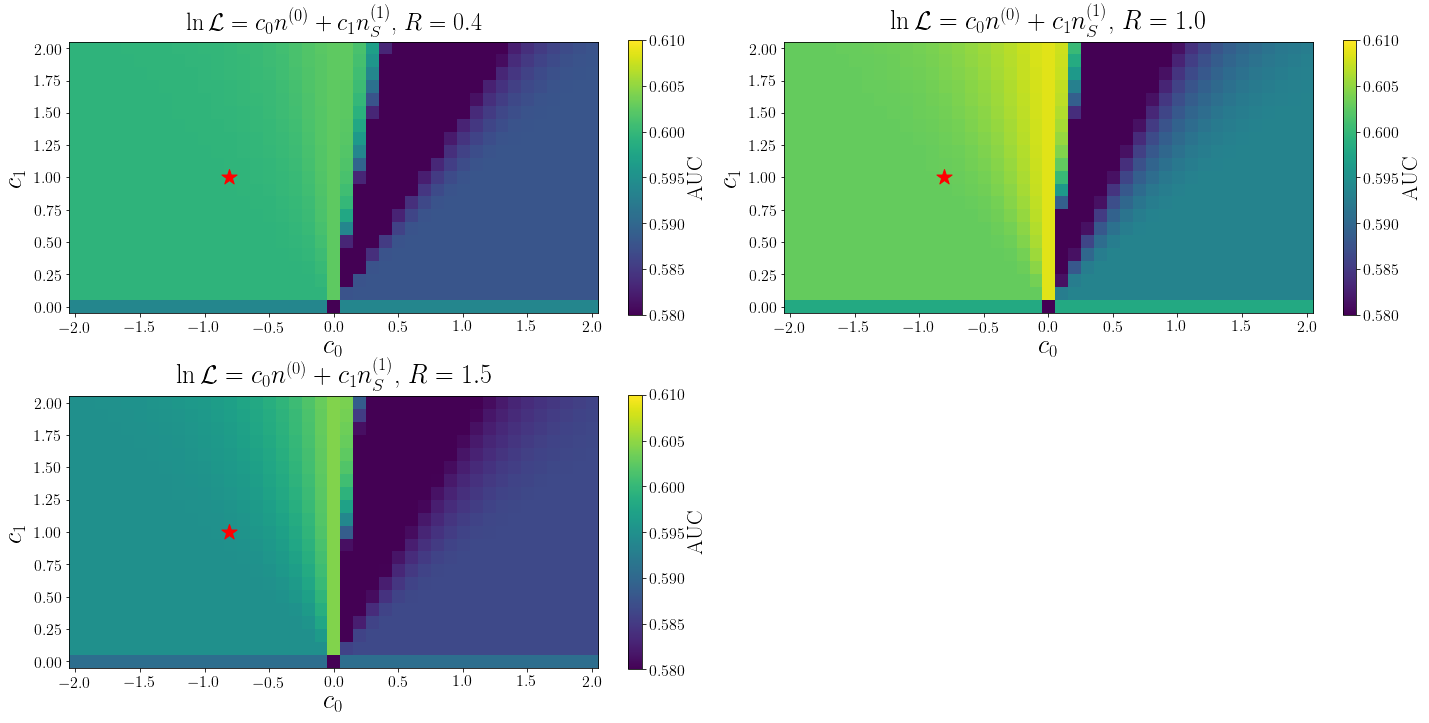

In [6]:
CF = 4/3
CA = 3

plt.figure(figsize=(20,10))
fsize=26
ax = plt.subplot(221)
auc_grid_r4 = plt.imshow(grid_r4.transpose(),origin='lower',extent=(-2.05,2.05,-0.05,2.05),vmin=0.50,vmax=0.61)
bar = plt.colorbar(auc_grid_r4,fraction=0.055)
bar.ax.tick_params(labelsize=16)
bar.set_label("AUC",fontsize=fsize-4)
plt.scatter(np.log(CF/CA),1,s=16**2,marker="*",c="red")
plt.title(r'$\ln\mathcal{L} = c_0n^{(0)} + c_1n_S^{(1)}$, $R = 0.4$',fontsize=fsize-2)
plt.xlabel(r"$c_0$",fontsize=fsize)
plt.ylabel(r"$c_1$",fontsize=fsize)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax = plt.subplot(222)
auc_grid_r1 = plt.imshow(grid_r1.transpose(),origin='lower',extent=(-2.05,2.05,-0.05,2.05),vmin=0.50,vmax=0.61)
bar = plt.colorbar(auc_grid_r1,fraction=0.055)
bar.ax.tick_params(labelsize=16)
bar.set_label("AUC",fontsize=fsize-4)
plt.scatter(np.log(CF/CA),1,s=16**2,marker="*",c="red")
plt.title(r'$\ln\mathcal{L} = c_0n^{(0)} + c_1n_S^{(1)}$, $R = 1.0$',fontsize=fsize)
plt.xlabel(r"$c_0$",fontsize=fsize)
plt.ylabel(r"$c_1$",fontsize=fsize)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax = plt.subplot(223)
auc_grid_r15 = plt.imshow(grid_r15.transpose(),origin='lower',extent=(-2.05,2.05,-0.05,2.05),vmin=0.50,vmax=0.61)
bar = plt.colorbar(auc_grid_r15,fraction=0.055)
bar.ax.tick_params(labelsize=16)
bar.set_label("AUC",fontsize=fsize-4)
plt.scatter(np.log(CF/CA),1,s=16**2,marker="*",c="red")
plt.title(r'$\ln\mathcal{L} = c_0n^{(0)} + c_1n_S^{(1)}$, $R = 1.5$',fontsize=fsize)
plt.xlabel(r"$c_0$",fontsize=fsize)
plt.ylabel(r"$c_1$",fontsize=fsize)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#plt.savefig("plots/compare_rad_c0c1_scan_AUC_CF1.3_sqg0100-esq0010.pdf")

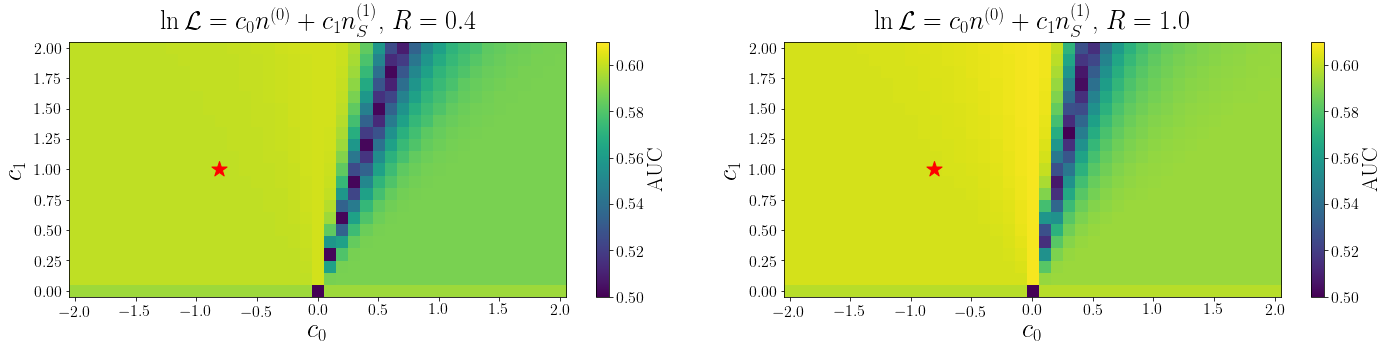

In [9]:
plt.figure(figsize=(20,5))
fsize=26
ax = plt.subplot(121)
auc_grid_r4 = plt.imshow(grid_r4.transpose(),origin='lower',extent=(-2.05,2.05,-0.05,2.05),vmin=0.5,vmax=0.61)
bar = plt.colorbar(auc_grid_r4,fraction=0.055)
bar.ax.tick_params(labelsize=16)
bar.set_label("AUC",fontsize=fsize-4)
plt.scatter(np.log(CF/CA),1,s=16**2,marker="*",c="red")
plt.title(r'$\ln\mathcal{L} = c_0n^{(0)} + c_1n_S^{(1)}$, $R = 0.4$',fontsize=fsize)
plt.xlabel(r"$c_0$",fontsize=fsize)
plt.ylabel(r"$c_1$",fontsize=fsize)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax = plt.subplot(122)
auc_grid_r1 = plt.imshow(grid_r1.transpose(),origin='lower',extent=(-2.05,2.05,-0.05,2.05),vmin=0.5,vmax=0.61)
bar = plt.colorbar(auc_grid_r1,fraction=0.055)
bar.ax.tick_params(labelsize=16)
bar.set_label("AUC",fontsize=fsize-4)
plt.scatter(np.log(CF/CA),1,s=16**2,marker="*",c="red")
plt.title(r'$\ln\mathcal{L} = c_0n^{(0)} + c_1n_S^{(1)}$, $R = 1.0$',fontsize=fsize)
plt.xlabel(r"$c_0$",fontsize=fsize)
plt.ylabel(r"$c_1$",fontsize=fsize)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig("plots/compare_r4r1_c0c1scan_AUC_CF1.3CA3.0_sqg0100-esq0010_horiz.pdf")

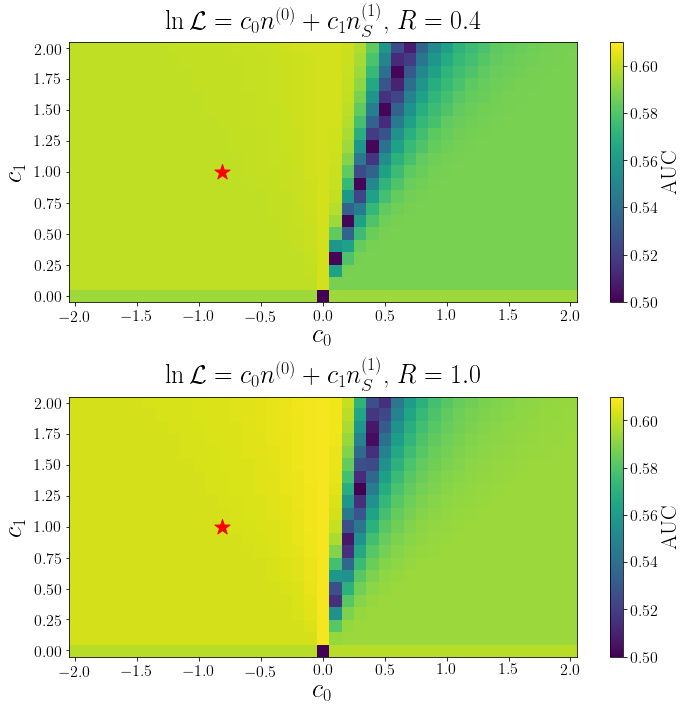

In [10]:
plt.figure(figsize=(10,10))
fsize=26
ax = plt.subplot(211)
auc_grid_r4 = plt.imshow(grid_r4.transpose(),origin='lower',extent=(-2.05,2.05,-0.05,2.05),vmin=0.5,vmax=0.61)
bar = plt.colorbar(auc_grid_r4,fraction=0.055)
bar.ax.tick_params(labelsize=16)
bar.set_label("AUC",fontsize=fsize-4)
plt.scatter(np.log(CF/CA),1,s=16**2,marker="*",c="red")
plt.title(r'$\ln\mathcal{L} = c_0n^{(0)} + c_1n_S^{(1)}$, $R = 0.4$',fontsize=fsize)
plt.xlabel(r"$c_0$",fontsize=fsize)
plt.ylabel(r"$c_1$",fontsize=fsize)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax = plt.subplot(212)
auc_grid_r1 = plt.imshow(grid_r1.transpose(),origin='lower',extent=(-2.05,2.05,-0.05,2.05),vmin=0.5,vmax=0.61)
bar = plt.colorbar(auc_grid_r1,fraction=0.055)
bar.ax.tick_params(labelsize=16)
bar.set_label("AUC",fontsize=fsize-4)
plt.scatter(np.log(CF/CA),1,s=16**2,marker="*",c="red")
plt.title(r'$\ln\mathcal{L} = c_0n^{(0)} + c_1n_S^{(1)}$, $R = 1.0$',fontsize=fsize)
plt.xlabel(r"$c_0$",fontsize=fsize)
plt.ylabel(r"$c_1$",fontsize=fsize)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig("plots/compare_r4r1_c0c1scan_AUC_CF1.3CA3.0_sqg0100-esq0010_vert.pdf")

In [7]:
c0_0_val = 0
c1_0_val = 0
print("Benchmarks at R = 0.4")
for i,pt in enumerate(points):
    c0c1 = pt.split(",")
    auc = aucs_c0c1_scan_r4[i]
    c0, c1 = float(c0c1[0]),float(c0c1[1])
    if c0 == 0 and auc != c0_0_val and auc > 0.5:
        print("c0 = 0, c1 = {0}, AUC = {1}".format(c1,auc))
        c0_0_val = auc
    if c1 == 0 and auc != c1_0_val and auc > 0.5:
        print("c0 = {0}, c1 = 0, AUC = {1}".format(c0,auc))
        c1_0_val = auc
    if (c0 == -0.9 or c0 == -0.8) and c1 == 1:
        print("With the default coefficients AUC = {0}".format(auc))
    if c0 == 1.5 and c1 == 1:
        print("At c_0 = 1.5, c_1 = 1, AUC = {0}".format(auc))
    if c0 == -1.5 and c1 == 1:
        print("At c_0 = -1.5, c_1 = 1, AUC = {0}".format(auc))
print("----------------------")
c0_0_val = 0
c1_0_val = 0
print("Benchmarks at R = 1")
for i,pt in enumerate(points):
    c0c1 = pt.split(",")
    auc = aucs_c0c1_scan_r1[i]
    c0, c1 = float(c0c1[0]),float(c0c1[1])
    if c0 == 0 and auc != c0_0_val and auc > 0.5:
        print("c0 = 0, c1 = {0}, AUC = {1}".format(c1,auc))
        c0_0_val = auc
    if c1 == 0 and auc != c1_0_val and auc > 0.5:
        print("c0 = {0}, c1 = 0, AUC = {1}".format(c0,auc))
        c1_0_val = auc
    if (c0 == -0.9 or c0 == -0.8) and c1 == 1:
        print("With the default coefficients AUC = {0}".format(auc))
    if c0 == 1.5 and c1 == 1:
        print("At c_0 = 1.5, c_1 = 1, AUC = {0}".format(auc))
    if c0 == -1.5 and c1 == 1:
        print("At c_0 = -1.5, c_1 = 1, AUC = {0}".format(auc))
print("----------------------")
c0_0_val = 0
c1_0_val = 0
print("Benchmarks at R = 1.5")
for i,pt in enumerate(points):
    c0c1 = pt.split(",")
    auc = aucs_c0c1_scan_r15[i]
    c0, c1 = float(c0c1[0]),float(c0c1[1])
    if c0 == 0 and auc != c0_0_val and auc > 0.5:
        print("c0 = 0, c1 = {0}, AUC = {1}".format(c1,auc))
        c0_0_val = auc
    if c1 == 0 and auc != c1_0_val and auc > 0.5:
        print("c0 = {0}, c1 = 0, AUC = {1}".format(c0,auc))
        c1_0_val = auc
    if (c0 == -0.9 or c0 == -0.8) and c1 == 1:
        print("With the default coefficients AUC = {0}".format(auc))
    if c0 == 1.5 and c1 == 1:
        print("At c_0 = 1.5, c_1 = 1, AUC = {0}".format(auc))
    if c0 == -1.5 and c1 == 1:
        print("At c_0 = -1.5, c_1 = 1, AUC = {0}".format(auc))
print("----------------------")

Benchmarks at R = 0.4
c0 = -2.0, c1 = 0, AUC = 0.5937581356
At c_0 = -1.5, c_1 = 1, AUC = 0.5995475396000001
With the default coefficients AUC = 0.5995516392
With the default coefficients AUC = 0.5995711056
c0 = 0, c1 = 0.1, AUC = 0.6025632448
At c_0 = 1.5, c_1 = 1, AUC = 0.5879687316
----------------------
Benchmarks at R = 1
c0 = -2.0, c1 = 0, AUC = 0.5981643284
At c_0 = -1.5, c_1 = 1, AUC = 0.6028789996
With the default coefficients AUC = 0.6029216528
With the default coefficients AUC = 0.6029917180000001
c0 = 0, c1 = 0.1, AUC = 0.6086038032000001
At c_0 = 1.5, c_1 = 1, AUC = 0.5934490892
----------------------
Benchmarks at R = 1.5
c0 = -2.0, c1 = 0, AUC = 0.5908566029999999
At c_0 = -1.5, c_1 = 1, AUC = 0.5950446108
With the default coefficients AUC = 0.5951356296
With the default coefficients AUC = 0.5952540392000001
c0 = 0, c1 = 0.1, AUC = 0.6043545615999999
At c_0 = 1.5, c_1 = 1, AUC = 0.5866662636
----------------------


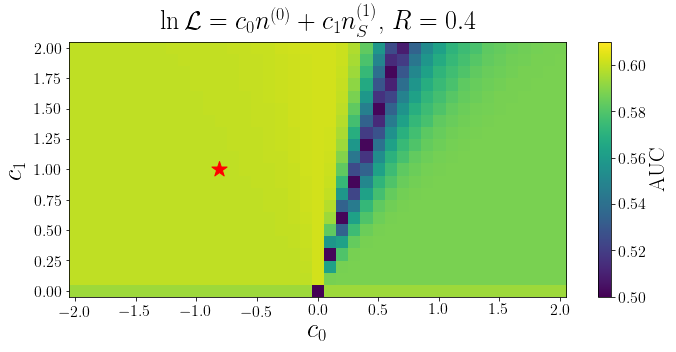

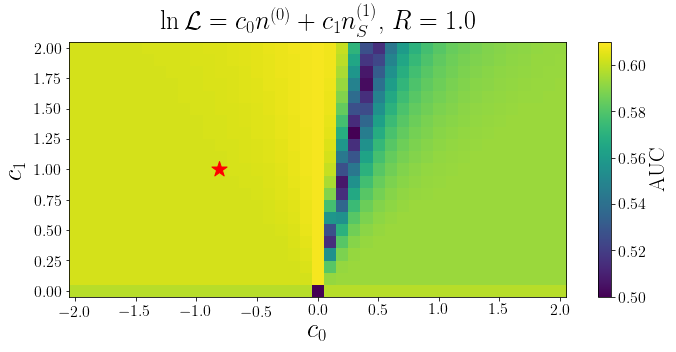

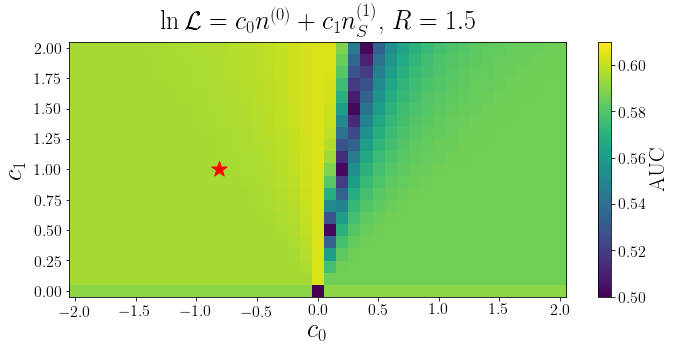

In [17]:
grids = [grid_r4,grid_r1,grid_r15]
rads = [0.4,1.0,1.5]
fsize = 26
for i,grid in enumerate(grids):
    plt.figure(figsize=(10,5))
    auc_grid = plt.imshow(grid.transpose(),origin='lower',extent=(-2.05,2.05,-0.05,2.05),vmin=0.5,vmax=0.61)
    bar = plt.colorbar(auc_grid,fraction=0.055)
    bar.ax.tick_params(labelsize=16)
    bar.set_label("AUC",fontsize=fsize-4)
    plt.scatter(np.log(CF/CA),1,s=16**2,marker="*",c="red")
    plt.title(r'$\ln\mathcal{L} = c_0n^{(0)} + c_1n_S^{(1)}$, $R ='+str(rads[i])+'$',fontsize=fsize)
    plt.xlabel(r"$c_0$",fontsize=fsize)
    plt.ylabel(r"$c_1$",fontsize=fsize)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.savefig('plots/c0c1_AUC_grid_sqg0100-esq0010-r'+str(rads[i])+'.pdf')